# Importing Libraries

In [1]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from nltk.tokenize import word_tokenize, sent_tokenize
import re # ???

## comments
* I was not able to download spaCy for some reason so I will work my way around

# Input Handling

In [2]:
def read_text_file(file_path):
    """
    Reads the content of a .txt file.
    
    :param file_path: Path to the text file.
    :return: The content of the file as a string or None if an error occurs.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        return text
    except FileNotFoundError:
        print("File not found! Please provide a valid file path.")
        return None

file_path = 'Thisisatest.txt'
content = read_text_file(file_path)

if content is not None:
    print(content)


This is a test.


# Text Analysis

In [3]:
def analyze_text(text):
    """
    Analyzes the given text and returns statistics.
    
    :param text: The text to analyze.
    :return: A dictionary with word, sentence, paragraph, and character counts, and average word length.
    """
    # Normalize whitespace and split the text by spaces
    words = text.split()
    sentences = sent_tokenize(text)
    paragraphs = text.split("\n\n")
    
    total_characters = len(text)
    total_characters_no_spaces = len(text.replace(" ", ""))
    total_words = len([word for word in words if word])  # Count non-empty words
    avg_word_length = total_characters_no_spaces / total_words if total_words > 0 else 0
    
    analysis = {
        'word_count': total_words,
        'sentence_count': len(sentences),
        'paragraph_count': len(paragraphs),
        'character_count': total_characters,
        'character_count_no_spaces': total_characters_no_spaces,
        'average_word_length': avg_word_length
    }
    
    return analysis

# Main execution
file_path = 'Thisisatest.txt'
content = read_text_file(file_path)

if content is not None:
    print(content)  # Print the content of the file
    analysis_result = analyze_text(content)  # Analyze the content
    print(analysis_result)  # Print the analysis result

    

This is a test.
{'word_count': 4, 'sentence_count': 1, 'paragraph_count': 1, 'character_count': 15, 'character_count_no_spaces': 12, 'average_word_length': 3.0}


## comments
* word count was 5, edited a lot so it is now 4 and thus correct
* average word length is rounded off weirdly

# Visualization

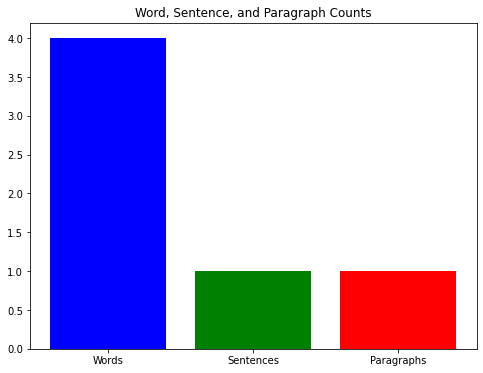

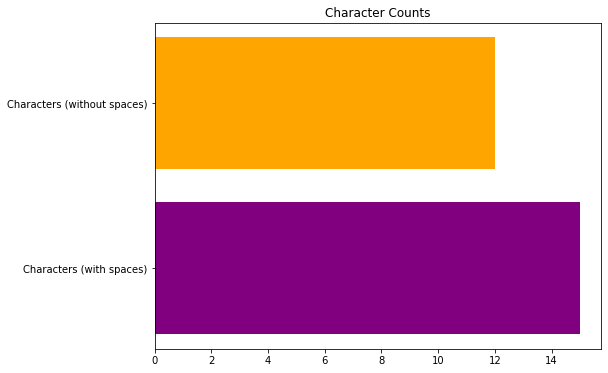

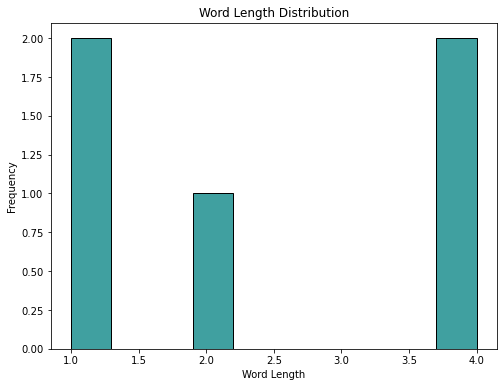

In [4]:
def generate_visualizations(analysis_result, content):
    """
    Generates and displays the required visualizations based on the analysis.
    
    :param analysis: The text analysis dictionary.
    :param text: The original text for word length distribution.
    """
    # Bar chart for word, sentence, and paragraph counts
    plt.figure(figsize=(8, 6))
    plt.bar(['Words', 'Sentences', 'Paragraphs'], 
            [analysis_result['word_count'], analysis_result['sentence_count'], analysis_result['paragraph_count']],
            color=['blue', 'green', 'red'])
    plt.title('Word, Sentence, and Paragraph Counts')
    plt.savefig('counts_chart.png')
    plt.show()
    
    # Horizontal bar chart for character counts
    plt.figure(figsize=(8, 6))
    plt.barh(['Characters (with spaces)', 'Characters (without spaces)'], 
             [analysis_result['character_count'], analysis_result['character_count_no_spaces']], 
             color=['purple', 'orange'])
    plt.title('Character Counts')
    plt.savefig('character_chart.png')
    plt.show()
    
    # Histogram of word length distribution
    word_lengths = [len(word) for word in word_tokenize(content)]
    plt.figure(figsize=(8, 6))
    sns.histplot(word_lengths, kde=False, bins=10, color='teal')
    plt.title('Word Length Distribution')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.savefig('word_length_histogram.png')
    plt.show()

generate_visualizations(analysis_result, content)


## comments
* remember to add plt.savefig('title.png') later
* images are not saved for some reason

# PDF Generation - not done yet!

In [5]:
from fpdf import FPDF

class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Text Analysis Report', 0, 1, 'C')

    def add_analysis_summary(self, analysis):
        self.set_font('Arial', '', 12)
        self.ln(10)
        self.cell(0, 10, f"Word Count: {analysis['word_count']}", 0, 1)
        self.cell(0, 10, f"Sentence Count: {analysis['sentence_count']}", 0, 1)
        self.cell(0, 10, f"Paragraph Count: {analysis['paragraph_count']}", 0, 1)
        self.cell(0, 10, f"Character Count (with spaces): {analysis['character_count_with_spaces']}", 0, 1)
        self.cell(0, 10, f"Character Count (without spaces): {analysis['character_count_without_spaces']}", 0, 1)
        self.cell(0, 10, f"Average Word Length: {analysis['average_word_length']:.2f}", 0, 1)

    def add_image(self, image_path):
        self.ln(10)
        self.image(image_path, x=10, w=190)

def generate_pdf_report(analysis):
    """
    Generates a PDF report of the text analysis.
    
    :param analysis: The text analysis dictionary.
    """
    pdf = PDFReport()
    pdf.add_page()

    # Add summary
    pdf.add_analysis_summary(analysis)

    # Add images
    try:
        pdf.add_image('counts_chart.png')
        pdf.add_image('character_chart.png')
        pdf.add_image('word_length_histogram.png')
    except FileNotFoundError as e:
        print(f"Warning: {e} - One or more image files not found.")

    # Save PDF
    pdf.output('text_analysis_report.pdf')
    print("PDF report generated: 'text_analysis_report.pdf'")

# Example analysis dictionary for testing
if __name__ == '__main__':
    example_analysis = {
        'word_count': 120,
        'sentence_count': 10,
        'paragraph_count': 3,
        'character_count_with_spaces': 600,
        'character_count_without_spaces': 500,
        'average_word_length': 4.17
    }
    
    generate_pdf_report(example_analysis)


PDF report generated: 'text_analysis_report.pdf'


<ipython-input-5-c2b888536e2c>:5: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
<ipython-input-5-c2b888536e2c>:6: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Text Analysis Report', 0, 1, 'C')
<ipython-input-5-c2b888536e2c>:9: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)
<ipython-input-5-c2b888536e2c>:11: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, f"Word Count: {analysis['word_count']}", 0, 1)
<ipython-input-5-c2b888536e2c>:12: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 

## comments
* images are not saved
* images are therefore not in the pdf doc
* all the analysis numbers are wrong

# Main Function - not done yet!

In [6]:
def main(file_path):
    # Read text from file
    text = read_text_file(file_path)
    if not text:
        return
    
    # Perform text analysis
    analysis = analyze_text(text)
    
    # Generate visualizations
    generate_visualizations(analysis)
    
    # Generate PDF report
    generate_pdf_report(analysis)
    
    print("Text analysis completed! Report saved as 'text_analysis_report.pdf'.")

# Example Usage
if __name__ == '__main__':
    file_path = 'example.txt'  # Replace with your .txt file path
    main(file_path)


File not found! Please provide a valid file path.


In [9]:
name = 'Evy'
print(name)

Evy
